# The NumPy array object

In [1]:
# Our usual import.
import numpy as np

## What are NumPy and NumPy arrays?

### NumPy arrays

**NumPy** provides:

- An extension package to Python for multi-dimensional arrays.
- An implementation that is closer to hardware (efficiency).
- Package designed for scientific computation (convenience).
- An implementation of _array oriented computing_.

In [2]:
import numpy as np

a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

::: {note}
:class: dropdown

For example, An array containing:

- values of an experiment/simulation at discrete time steps

- signal recorded by a measurement device, e.g. sound wave

- pixels of an image, grey-level or colour

- 3-D data measured at different X-Y-Z positions, e.g. MRI scan

- ...
  :::

**Why it is useful:** Memory-efficient container that provides fast numerical
operations.

In [3]:
L = range(1000)
%timeit [i**2 for i in L]

54.3 μs ± 372 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
a = np.arange(1000)
%timeit a**2

1.09 μs ± 3.52 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


<!---
extension package to Python to support multidimensional arrays
-->
<!---
diagram, import conventions
-->
<!---
scope of this tutorial: drill in features of array manipulation in
Python, and try to give some indication on how to get things done
in good style
-->
<!---
a fixed number of elements (cf. certain exceptions)
-->
<!---
each element of same size and type
-->
<!---
efficiency vs. Python lists
-->

### NumPy Reference documentation

**On the web**:

<https://numpy.org/doc/>

**Interactive help:**

```ipython
In [5]: np.array?
String Form:<built-in function array>
Docstring:
array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0, ...
```

You can also use the Python builtin `help` command to show the docstring for a function:

In [5]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)

    Create an array.

    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        ``__array__`` method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array. If not given, NumPy will try to use
        a default ``dtype`` that can represent the values (by applying promotion
        rules when necessary.)
    copy : bool, optional
        If ``True`` (default), then the array data is copied. If ``None``,
        a copy will only be made if ``__array__`` returns a copy, if obj is
        a nested sequence, or if a copy is needed to satisfy any of the other
        requirements (``dtype``, ``order``, 

#### Looking for something:

```ipython
In [6]: np.con*?
np.concatenate
np.conj
np.conjugate
np.convolve
```

### Import conventions

The recommended convention to import NumPy is:

In [6]:
import numpy as np

## Creating arrays

### Manual construction of arrays

- **1-D**:

In [7]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [8]:
a.ndim

1

In [9]:
a.shape

(4,)

In [10]:
len(a)

4

- **2-D, 3-D, ...**:

In [11]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
b.ndim

2

In [13]:
b.shape

(2, 3)

In [14]:
len(b)     # returns the size of the first dimension

2

In [15]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [16]:
c.shape

(2, 2, 1)

::: {exercise-start}
:label: np-ao-first-ex
:class: dropdown
:::

- Create a simple two dimensional array. First, redo the examples
  from above. And then create your own: how about odd numbers
  counting backwards on the first row, and even numbers on the second?
- Use the functions {func}`len`, {func}`numpy.shape` on these arrays.
  How do they relate to each other? And to the `ndim` attribute of
  the arrays?

::: {exercise-end}
:::

### Functions for creating arrays

::: {note}
:class: dropdown

In practice, we rarely enter items one by one...
:::

**Evenly spaced**:

In [17]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

— or **by number of points**

In [19]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [20]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

**Common arrays**

In [21]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [22]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [23]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

- {mod}`numpy.random`: random numbers (Mersenne Twister PRNG):

In [25]:
rng = np.random.default_rng(27446968)
a = rng.random(4)       # uniform in [0, 1]
a

array([0.64613018, 0.48984931, 0.50851229, 0.22563948])

In [26]:
b = rng.standard_normal(4)      # Gaussian
b

array([-0.38250769, -0.61536465,  0.98131732,  0.59353096])

::: {exercise-start}
:label: np-ao-func1-ex
:class: dropdown
:::

- Experiment with `arange`, `linspace`, `ones`, `zeros`, `eye` and
  `diag`.
- Create different kinds of arrays with random numbers.
- Try setting the seed before creating an array with random values.
- Look at the function `np.empty`. What does it do? When might this be
  useful?

::: {exercise-end}
:::

::: {exercise-start}
:label: np-ao-func2-ex
:class: dropdown
:::

- construct an array containing: 1 2 3 4 5
- construct an array containing: -5, -4, -3, -2, -1
- Construct: 2 4 6 8
- Construct 15 equispaced numbers in range [0, 10]

::: {exercise-end}
:::

::: {solution-start} np-ao-func2-ex
:class: dropdown
:::

In [27]:
np.arange(1, 6)

array([1, 2, 3, 4, 5])

In [28]:
np.arange(-5, 0)

array([-5, -4, -3, -2, -1])

In [29]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

In [30]:
np.linspace(0, 10, 15)

array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ])

::: {solution-end}
:::

## Basic data types

You may have noticed that, in some instances, array elements are displayed with
a trailing dot (e.g. `2.` vs `2`). This is due to a difference in the
data-type used:

In [31]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [32]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

::: {note}
:class: dropdown

Different data-types allow us to store data more compactly in memory,
but most of the time we simply work with floating point numbers.
Note that, in the example above, NumPy auto-detects the data-type
from the input.
:::

You can explicitly specify which data-type you want:

In [33]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

The **default** data type is floating point:

In [34]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

There are also other types:

## Bool

In [35]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

## Strings

In [36]:
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## Much more:

- `int32`
- `int64`
- `uint32`
- `uint64`
- ...

<!---
XXX: mention: astype
-->

## Basic visualization

Now that we have our first data arrays, we are going to visualize them.

Start by launching IPython:

```bash
$ ipython # or ipython3 depending on your install
```

Or the notebook:

```bash
$ jupyter notebook
```

If you are using IPython enable interactive plots with:

In [37]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


Interactive plots are enabled automatically in the Jupyter Notebook.

_Matplotlib_ is a 2D plotting package. We can import its functions as below:

In [38]:
import matplotlib.pyplot as plt  # the tidy way

And then use (note that you have to use `show` explicitly if you have not enabled interactive plots with `%matplotlib`):

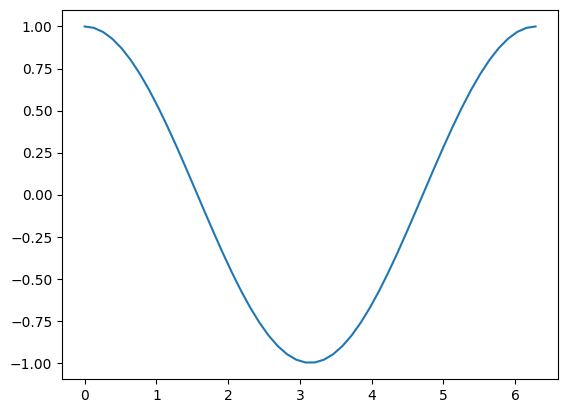

In [39]:
# Example data
x = np.linspace(0, 2 * np.pi)
y = np.cos(x)

plt.plot(x, y)       # line plot
plt.show()           # <-- shows the plot (not needed with interactive plots)

Or, if you have enabled interactive plots with `%matplotlib`:

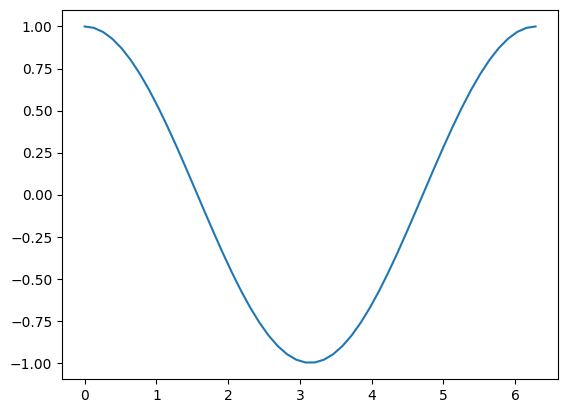

In [40]:
plt.plot(x, y)       # line plot

- **1D plotting**:

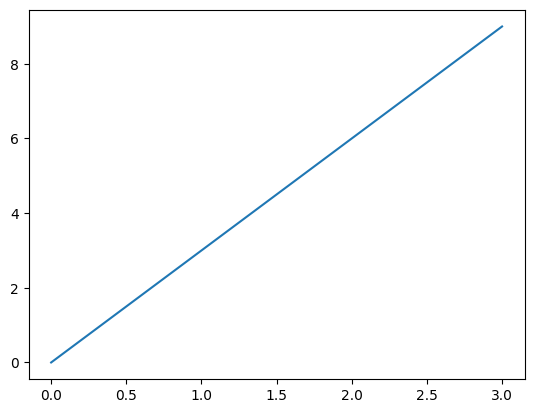

In [41]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot

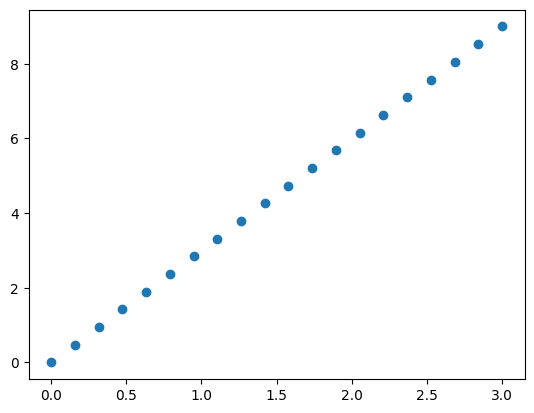

In [42]:
plt.plot(x, y, 'o')  # dot plot

- **2D arrays** (such as images):

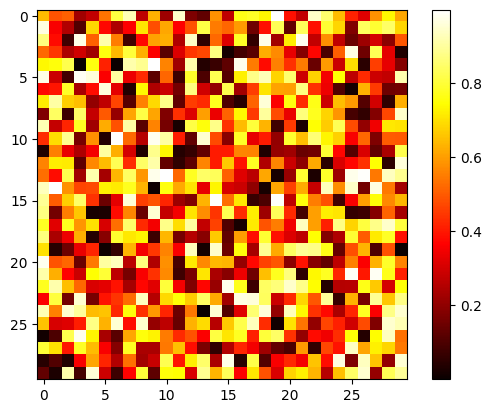

In [43]:
rng = np.random.default_rng(27446968)
image = rng.random((30, 30))
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

:::{admonition} See also

More in the: {ref}`matplotlib chapter <matplotlib>`
:::

::: {exercise-start}
:label: np-ao-viz-ex
:class: dropdown
:::

- Plot some simple arrays: a cosine as a function of time and a 2D
  matrix.
- Try using the `gray` colormap on the 2D matrix.

::: {exercise-end}
:::

## Indexing and slicing

The items of an array can be accessed and assigned to the same way as
other Python sequences (e.g. lists):

In [44]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
a[0], a[2], a[-1]

(np.int64(0), np.int64(2), np.int64(9))

:::{warning}
Indices begin at 0, like other Python sequences (and C/C++).
In contrast, in Fortran or Matlab, indices begin at 1.
:::

The usual python idiom for reversing a sequence is supported:

In [46]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For multidimensional arrays, indices are tuples of integers:

In [47]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [48]:
a[1, 1]

np.int64(1)

In [49]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [50]:
a[1]

array([0, 1, 0])

:::{note}

- In 2D, the first dimension corresponds to **rows**, the second
  to **columns**.
- for multidimensional `a`, `a[0]` is interpreted by
  taking all elements in the unspecified dimensions.
  :::

**Slicing**: Arrays, like other Python sequences can also be sliced:

In [51]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Note that the last index is not included! :

In [53]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: by default, `start` is 0,
`end` is the last and `step` is 1:

In [54]:
a[1:3]

array([1, 2])

In [55]:
a[::2]

array([0, 2, 4, 6, 8])

In [56]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

A small illustrated summary of NumPy indexing and slicing...

![](../../pyximages/numpy_indexing.png)

You can also combine assignment and slicing:

In [57]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [58]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

::: {exercise-start}
:label: np-ao-slicing-ex
:class: dropdown
:::

- Try the different flavours of slicing, using `start`, `end` and
  `step`: starting from a linspace, try to obtain odd numbers
  counting backwards, and even numbers counting forwards.
- Reproduce the slices in the diagram above. You may
  use the following expression to create the array:

```python
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
```

::: {exercise-end}
:::

::: {exercise-start}
:label: np-ao-creation-ex
:class: dropdown
:::

An exercise on array creation.

Create the following arrays (with correct data types):

```python
[[1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 6, 1, 1]]

[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
```

Par on course: 3 statements for each.

_Hint_: Individual array elements can be accessed similarly to a list,
e.g. `a[1]` or `a[1, 2]`.

_Hint_: Examine the docstring for `diag`.

::: {exercise-end}
:::

::: {solution-start} np-ao-creation-ex
:class: dropdown
:::

In [59]:
a = np.ones((4, 4), dtype=int)
a[3, 1] = 6
a[2, 3] = 2
a

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 6, 1, 1]])

In [60]:
b = np.zeros((6, 5))
b[1:] = np.diag(np.arange(2, 7))
b

array([[0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 6.]])

::: {solution-end}
:::

::: {exercise-start}
:label: np-ao-tiling-ex
:class: dropdown
:::

Exercise on tiling for array creation.

Skim through the documentation for `np.tile`, and use this function
to construct the array:

```python
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
```

::: {exercise-end}
:::

::: {solution-start} np-ao-tiling-ex
:class: dropdown
:::

In [61]:
block = np.array([[4, 3], [2, 1]])
a = np.tile(block, (2, 3))
a

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

::: {solution-end}
:::

## Copies and views

A slicing operation creates a **view** on the original array, which is
just a way of accessing array data. Thus the original array is not
copied in memory. You can use `np.may_share_memory()` to check if two arrays
share the same memory block. Note however, that this uses heuristics and may
give you false positives.

**When modifying the view, the original array is modified as well**:

In [62]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [64]:
np.may_share_memory(a, b)

True

In [65]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [66]:
a   # (!)

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [67]:
a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
np.may_share_memory(a, c)

False

This behavior can be surprising at first sight... but it allows to save both
memory and time.

<!---
EXE: [1, 2, 3, 4, 5] -> [1, 2, 3]
-->
<!---
EXE: [1, 2, 3, 4, 5] -> [4, 5]
-->
<!---
EXE: [1, 2, 3, 4, 5] -> [1, 3, 5]
-->
<!---
EXE: [1, 2, 3, 4, 5] -> [2, 4]
-->
<!---
EXE: create an array [1, 1, 1, 1, 0, 0, 0]
-->
<!---
EXE: create an array [0, 0, 0, 0, 1, 1, 1]
-->
<!---
EXE: create an array [0, 1, 0, 1, 0, 1, 0]
-->
<!---
EXE: create an array [1, 0, 1, 0, 1, 0, 1]
-->
<!---
EXE: create an array [1, 0, 2, 0, 3, 0, 4]
-->
<!---
CHA: archimedean sieve
-->

### Worked example: Prime number sieve

![](images/prime-sieve.png)

Compute prime numbers in 0--99, with a sieve

First — construct a shape (100,) boolean array `is_prime`, filled with True in
the beginning:

In [69]:
is_prime = np.ones((100,), dtype=bool)

Next, cross out 0 and 1 which are not primes:

In [70]:
is_prime[:2] = 0

For each integer `j` starting from 2, cross out its higher multiples:

In [71]:
N_max = int(np.sqrt(len(is_prime) - 1))
for j in range(2, N_max + 1):
    is_prime[2*j::j] = False

Skim through `help(np.nonzero)`, and print the prime numbers

- Follow-up:

  - Move the above code into a script file named `prime_sieve.py`
  - Run it to check it works
  - Use the optimization suggested in [the sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes):

  > 1. Skip `j` which are already known to not be primes
  > 2. The first number to cross out is $j^2$

## Fancy indexing

::: {note}
:class: dropdown

NumPy arrays can be indexed with slices, but also with boolean or
integer arrays (**masks**). This method is called _fancy indexing_.
It creates **copies not views**.
:::

### Using boolean masks

In [72]:
rng = np.random.default_rng(27446968)
a = rng.integers(0, 21, 15)
a

array([ 3, 13, 12, 10, 10, 10, 18,  4,  8,  5,  6, 11, 12, 17,  3])

In [73]:
(a % 3 == 0)

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False,  True])

In [74]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3, 12, 18,  6, 12,  3])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [75]:
a[a % 3 == 0] = -1
a

array([-1, 13, -1, 10, 10, 10, -1,  4,  8,  5, -1, 11, -1, 17, -1])

### Indexing with an array of integers

In [76]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Indexing can be done with an array of integers, where the same index is repeated
several time:

In [77]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [78]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

**Tip**

When a new array is created by indexing with an array of integers, the
new array has the same shape as the array of integers:

In [79]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [80]:
a[idx]

array([[3, 4],
       [9, 7]])

---

The image below illustrates various fancy indexing applications

![](../../pyximages/numpy_fancy_indexing.png)

::: {exercise-start}
:label: np-ao-fancy-ex
:class: dropdown
:::

- Again, reproduce the fancy indexing shown in the diagram above.
- Use fancy indexing on the left and array creation on the right to assign
  values into an array, for instance by setting parts of the array in
  the diagram above to zero.

::: {exercise-end}
:::

We can even use fancy indexing and {ref}`broadcasting <broadcasting>` at
the same time:

In [81]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [82]:
i = np.array([[0, 1], [1, 2]])
a[i, 2]  # same as a[i, 2 * np.ones((2, 2), dtype=int)]

array([[ 2,  6],
       [ 6, 10]])